# sample code of ENAN (ENrichment ANalyses)

***
# ■ Fisher's Exact Test (FET)

In [3]:
from enan import FET


# 1. generate FET instance
dat = FET()

# 2. select gene or chem and indicate a database for reference
dat.gene(ref="enrichr",species="human")
"""
species indicates dictionary for ID conversion
- default: species='human'

"""

# 3. indicate a library from the database
dat.load_ref(library="KEGG_2019_Human")
"""
if necessary, own reference data set can be used by set_ref()
- ref: {term:{set},term:{set},...}

"""

# 4. indicate an object sequece of interest given as a set
dat.set_obj({"abca1","abcg1","abcb11","abcc2","abcc3","abcc4"})

# 5. calculation
res = dat.calc()
res.head()

choose below
- dic: biomart
- ref: enrichr, msigdb
Reference library: Enrichr
--- all libraries currently available ---
<< ready-to-use >>
- human
KEGG_2019_Human
- mouse
KEGG_2019_Mouse
<< need to be processed >>
- human
ChEA_2016
ENCODE_TF_ChIP-seq_2015
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Human_Gene_Atlas
PPI_Hub_Proteins
TRANSFAC_and_JASPAR_PWMs
- mouse
Mouse_Gene_Atlas
-----------------------------------------
species='human'
library='KEGG_2019_Human'
{'dict': {'database': 'BioMart', 'name': 'human'}, 'ref': {'database': 'Enrichr', 'name': 'KEGG_2019_Human'}}


,p value,adjusted p value,overlap,hit No.,total No.
ABC transporters,9.342519e-17,2.877496e-14,"{abcc3, abcb11, abcc2, abcg1, abcc4, abca1}",6,45
Bile secretion,2.331632e-09,3.590713e-07,"{abcc3, abcc2, abcb11, abcc4}",4,72
Cholesterol metabolism,9.185990e-05,9.430950e-03,"{abcb11, abca1}",2,50
Fat digestion and absorption,1.227652e-02,9.452923e-01,{abca1},1,41
cAMP signaling pathway,6.213331e-02,1.000000e+00,{abcc4},1,212


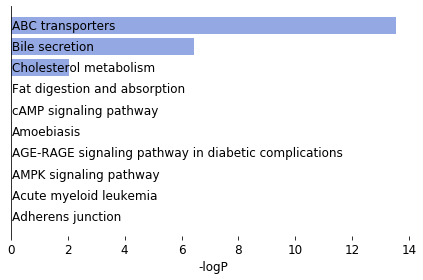

' focus indicates No. of terms to be visualized '

In [4]:
# 6. plot result
dat.plot(focus=10)
""" focus indicates No. of terms to be visualized """

***
# ■ Binomial Test (BT)
procedures are almost the same with those of FET

In [5]:
from enan import BT


# 1. generate BT instance
dat = BT()

# 2. select gene or chem and indicate a database for reference
dat.gene(ref="enrichr",species="human")
"""
species indicates dictionary for ID conversion
- default: species='human'

"""

# 3. indicate a library from the database
dat.load_ref(library="KEGG_2019_Human")
"""
if necessary, own reference data set can be used by set_ref()
- ref: {term:{set},term:{set},...}

"""

# 4. indicate an object sequece of interest given as a set
dat.set_obj({"abca1","abcg1","abcb11","abcc2","abcc3","abcc4"})

# 5. calculation
res = dat.calc()
res.head()

choose below
- dic: biomart
- ref: enrichr, msigdb
Reference library: Enrichr
--- all libraries currently available ---
<< ready-to-use >>
- human
KEGG_2019_Human
- mouse
KEGG_2019_Mouse
<< need to be processed >>
- human
ChEA_2016
ENCODE_TF_ChIP-seq_2015
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Human_Gene_Atlas
PPI_Hub_Proteins
TRANSFAC_and_JASPAR_PWMs
- mouse
Mouse_Gene_Atlas
-----------------------------------------
species='human'
library='KEGG_2019_Human'
{'dict': {'database': 'BioMart', 'name': 'human'}, 'ref': {'database': 'Enrichr', 'name': 'KEGG_2019_Human'}}


,p value,adjusted p value,overlap,hit No.,total No.
ABC transporters,9.984048e-10,3.075087e-07,"{abcc3, abcb11, abcc2, abcg1, abcc4, abca1}",6,45
Bile secretion,1.438272e-04,2.214938e-02,"{abcc3, abcc2, abcb11, abcc4}",4,72
Cholesterol metabolism,7.112213e-03,7.301872e-01,"{abcb11, abca1}",2,50
Fat digestion and absorption,8.093476e-02,1.000000e+00,{abca1},1,41
cAMP signaling pathway,8.963005e-01,1.000000e+00,{abcc4},1,212


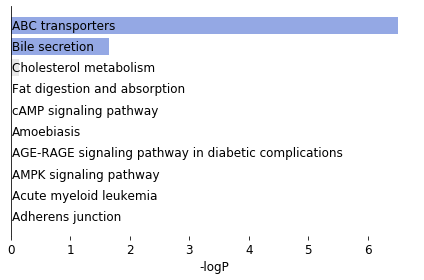

' focus indicates No. of terms to be visualized '

In [6]:
# 6. plot result
dat.plot(focus=10)
""" focus indicates No. of terms to be visualized """

***
# ■ GSEA

In [7]:
import pandas as pd
from enan import GSEA


# 0. prepare test data
from enan._utils import path_handler as ph
p = ph.get_base().replace("_utils","_test")
df = pd.read_csv(p + r"\grm.csv",index_col=0)
""" data given as a dataframe (feature x sample) """

# 1. generate GSEA instance
dat = GSEA()

# 2. select gene or chem and indicate a database for reference
dat.gene(ref="enrichr",species="mouse")
"""
species indicates dictionary for ID conversion
- default: species='human'

"""

# 3. indicate a library from the database
dat.load_ref(library="KEGG_2019_Mouse")
"""
if necessary, own reference data set can be used by set_ref()
- ref: {term:{set},term:{set},...}

"""

# 4. indicate an object data of interest given as a df (feature x sample)
dat.set_obj(df)

# 5. calculation
res = dat.calc(method="standard")
"""
method indicates calculation method of the enrichment scores
- default: 'standard'

"""
res.head()

choose below
- dic: biomart
- ref: enrichr, msigdb
Reference library: Enrichr
--- all libraries currently available ---
<< ready-to-use >>
- human
KEGG_2019_Human
- mouse
KEGG_2019_Mouse
<< need to be processed >>
- human
ChEA_2016
ENCODE_TF_ChIP-seq_2015
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Human_Gene_Atlas
PPI_Hub_Proteins
TRANSFAC_and_JASPAR_PWMs
- mouse
Mouse_Gene_Atlas
-----------------------------------------
species='mouse'
library='KEGG_2019_Mouse'
{'dict': {'database': 'BioMart', 'name': 'mouse'}, 'ref': {'database': 'Enrichr', 'name': 'KEGG_2019_Mouse'}}
Standard method


,KO1,KO2,KO3,KO4,KO5,KO6
"Phenylalanine, tyrosine and tryptophan biosynthesis",0.899906,0.859220,0.561552,0.933689,0.799812,0.895618
Caffeine metabolism,0.616229,0.863641,0.921050,0.798180,0.668200,0.515424
Systemic lupus erythematosus,0.610490,0.518423,0.371155,0.411441,0.412914,0.584487
Mismatch repair,0.577233,0.551681,0.493402,0.233166,0.457325,0.249555
Primary bile acid biosynthesis,0.569933,0.442420,0.423262,0.239322,0.270415,0.211997


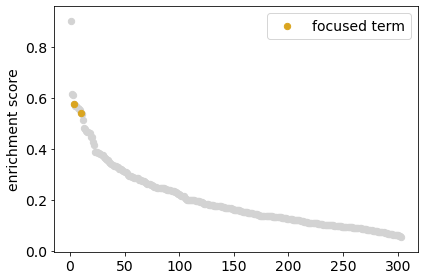

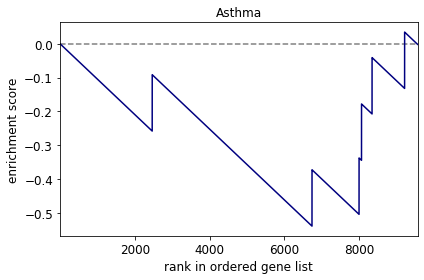

'\nfocus indicates a sample of interest\nfterm indicates a term of interest\n\n'

In [8]:
# 6a. visualize the scores of a term
dat.plot(focus="KO1",highlight=["Asthma","Mismatch repair"],label="focused term")
"""
focus indicates a sample of interest
highlight indicates a list of terms of interest
label indicates a label for highlightened plots

"""


# 6b. visualize the scores of a term as a running sum
dat.plot_running(focus="KO1",fterm="Asthma")
"""
focus indicates a sample of interest
fterm indicates a term of interest

"""

***
# ■ ssGSEA (focused mode)
ssGSEA for general use

In [9]:
import pandas as pd
from enan import ssGSEA


# 0. prepare test data
from enan._utils import path_handler as ph
p = ph.get_base().replace("_utils","_test")
df = pd.read_csv(p + r"\large_grm.csv",index_col=0)
df.columns = ["con{}".format(i) for i in range(50)] + ["treat{}".format(i) for i in range(df.shape[1] - 50)]
"""
data given as a dataframe (feature x sample)
sample names should contain an indicator of each group

"""

# 1. generate ssGSEA instance
dat = ssGSEA()

# 2. select gene or chem and indicate a database for reference
dat.gene(ref="enrichr",species="human")
"""
species indicates dictionary for ID conversion
- default: species='human'

"""

# 3. indicate a library from the database
dat.load_ref(library="KEGG_2019_Human")
"""
if necessary, own reference data set can be used by set_ref()
- ref: {term:{set},term:{set},...}

"""

# 4. indicate an object data of interest given as a df (feature x sample)
dat.set_obj(df)

# 5. calculation
res = dat.calc(fterm="Mismatch repair",method="standard")
"""
fterm indicates a term of interest
method indicates calculation method of the enrichment scores
- default: 'standard'

"""
res.head()

choose below
- dic: biomart
- ref: enrichr, msigdb
Reference library: Enrichr
--- all libraries currently available ---
<< ready-to-use >>
- human
KEGG_2019_Human
- mouse
KEGG_2019_Mouse
<< need to be processed >>
- human
ChEA_2016
ENCODE_TF_ChIP-seq_2015
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Human_Gene_Atlas
PPI_Hub_Proteins
TRANSFAC_and_JASPAR_PWMs
- mouse
Mouse_Gene_Atlas
-----------------------------------------
species='human'
library='KEGG_2019_Human'
{'dict': {'database': 'BioMart', 'name': 'human'}, 'ref': {'database': 'Enrichr', 'name': 'KEGG_2019_Human'}}
Standard method


,ES
con21,0.479518
treat24,0.477094
treat34,0.473512
treat35,0.464919
con43,0.462805


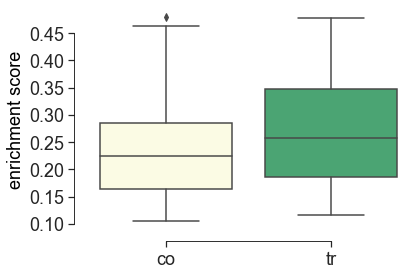

'\nkeyword indicates a list of keywords for sample selection\n\n'

In [10]:
# 6. visualize the scores of a term
dat.plot(keyword=["co","tr"],fontsize=18)
"""
keyword indicates a list of keywords for sample selection

"""

***
# ■ ssGSEA (exploratory mode)
an option to explore interesting terms  
note that it takes a relatively long time

In [11]:
import pandas as pd
from enan import ssGSEA


# 0. prepare test data
from enan._utils import path_handler as ph
p = ph.get_base().replace("_utils","_test")
df = pd.read_csv(p + r"\large_grm.csv",index_col=0)
df.columns = ["con{}".format(i) for i in range(50)] + ["treat{}".format(i) for i in range(df.shape[1] - 50)]
"""
data given as a dataframe (feature x sample)
sample names should contain an indicator of each group

"""

# 1. generate ssGSEA instance
dat = ssGSEA()

# 2. select gene or chem and indicate a database for reference
dat.gene(ref="enrichr",species="human")
"""
species indicates dictionary for ID conversion
- default: species='human'

"""

# 3. indicate a library from the database
dat.load_ref(library="KEGG_2019_Human")
"""
if necessary, own reference data set can be used by set_ref()
- ref: {term:{set},term:{set},...}

"""

# 4. indicate an object data of interest given as a df (feature x sample)
dat.set_obj(df)

# 5. calculation
res = dat.calc(method="standard")
"""
exploratory mode runs when fterm is not indicated
method indicates calculation method of the enrichment scores
- default: 'standard'

"""
res.head()

choose below
- dic: biomart
- ref: enrichr, msigdb
Reference library: Enrichr
--- all libraries currently available ---
<< ready-to-use >>
- human
KEGG_2019_Human
- mouse
KEGG_2019_Mouse
<< need to be processed >>
- human
ChEA_2016
ENCODE_TF_ChIP-seq_2015
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Human_Gene_Atlas
PPI_Hub_Proteins
TRANSFAC_and_JASPAR_PWMs
- mouse
Mouse_Gene_Atlas
-----------------------------------------
species='human'
library='KEGG_2019_Human'
{'dict': {'database': 'BioMart', 'name': 'human'}, 'ref': {'database': 'Enrichr', 'name': 'KEGG_2019_Human'}}
Standard method


100%|██████████████████████████████████████████████████████████████████████████████████| 92/92 [00:36<00:00,  2.52it/s]


,con0,con1,con2,con3,con4,con5,con6,con7,con8,con9,...,treat32,treat33,treat34,treat35,treat36,treat37,treat38,treat39,treat40,treat41
Mannose type O-glycan biosynthesis,0.413401,0.184700,0.304665,0.308922,0.321322,0.202963,0.178337,0.228537,0.194625,0.238948,...,0.253379,0.477568,0.175602,0.268612,0.163040,0.353073,0.293833,0.235679,0.349296,0.366971
Selenocompound metabolism,0.393654,0.250268,0.348561,0.271498,0.238788,0.317064,0.344047,0.402815,0.464464,0.259458,...,0.296944,0.374426,0.241195,0.319813,0.206828,0.359824,0.410262,0.342704,0.174807,0.297813
Phosphonate and phosphinate metabolism,0.391089,0.264996,0.406195,0.336491,0.320404,0.420794,0.274737,0.353421,0.245420,0.240900,...,0.246850,0.404682,0.437383,0.327180,0.391277,0.400652,0.460698,0.716507,0.449281,0.201766
"Phenylalanine, tyrosine and tryptophan biosynthesis",0.378552,0.418718,0.496783,0.507596,0.377114,0.266905,0.709294,0.425529,0.435389,0.286595,...,0.582216,0.298213,0.462020,0.435421,0.372289,0.515861,0.325034,0.443342,0.380020,0.244236
Ribosome biogenesis in eukaryotes,0.353979,0.335533,0.407578,0.219610,0.294262,0.284404,0.230879,0.241452,0.460660,0.164664,...,0.185444,0.117362,0.357779,0.205412,0.120752,0.217489,0.146794,0.314157,0.372866,0.117879


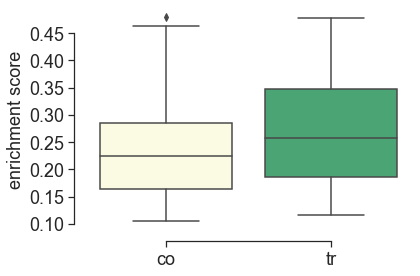

'\nkeyword indicates a list of keywords for sample selection\nfterm indicates a term of interest\n\n'

In [12]:
# 6. visualize the scores of a term
dat.plot(keyword=["co","tr"],fterm="Mismatch repair",fontsize=18)
"""
keyword indicates a list of keywords for sample selection
fterm indicates a term of interest

"""

***
# ■ Connectivity analysis

In [13]:
import pandas as pd
from enan import Connect


# 0. prepare test data
from enan._utils import path_handler as ph
p = ph.get_base().replace("_utils","_test")
df = pd.read_csv(p + r"\grm.csv",index_col=0)
df_ref = pd.read_csv(p + r"\large_grm.csv",index_col=0)
"""
an object data given as a dataframe (feature x sample)
a reference data given as a dict of up/down tags {term:(up-tag set,down-tag set),...}
an instance method converting dataframe to the appropriate dict is implemented

"""

# 1. generate Connect instance
dat = Connect()

# 2. select gene or chem and indicate a database for reference
dat.gene(ref="enrichr",species="human")
"""
species indicates dictionary for ID conversion
- default: species='human'

"""

# 3. set the reference data
# 3-1. prepare a reference data
prep = dat.call_PreProcessor()
ref = prep.vector2set(df_ref,fold=4,two_sided=True)
# 3-2. set the reference data
dat.set_ref(ref) # indicate reference dict
"""
PreProcessor object converts df to a reference dict by vector2set()
fold indicates 
two_sided should be true
- ref: {term:{set},term:{set},...}

"""

# 4. set an object data of interest given as a df (feature x sample)
dat.set_obj(df)

# 5. calculation
res = dat.calc()
res.head()

choose below
- dic: biomart
- ref: enrichr, msigdb
Reference library: Enrichr
--- all libraries currently available ---
<< ready-to-use >>
- human
KEGG_2019_Human
- mouse
KEGG_2019_Mouse
<< need to be processed >>
- human
ChEA_2016
ENCODE_TF_ChIP-seq_2015
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Human_Gene_Atlas
PPI_Hub_Proteins
TRANSFAC_and_JASPAR_PWMs
- mouse
Mouse_Gene_Atlas
-----------------------------------------
species='human'


,KO1,KO2,KO3,KO4,KO5,KO6
"11-deoxy-16,16-dimethylprostaglandin E2",0.416250,0.579762,0.466341,0.496756,0.527598,0.372966
15(S)-15-methylprostaglandin E2,0.000000,0.458419,0.369961,0.000000,0.000000,0.000000
"16,16-dimethylprostaglandin E2",0.000000,0.000000,0.279007,0.441614,0.000000,0.636020
6-bromoindirubin-3'-oxime,-0.518544,0.418431,0.251303,0.221891,0.000000,-0.264387
AR-A014418,0.165045,0.000000,0.000000,0.244408,0.000000,0.000000


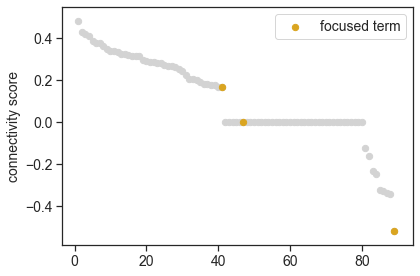

'\nfocus indicates a sample of interest\nhighlight indicates a list of terms of interest\nlabel indicates a label for highlightened plots\n\n'

In [14]:
# 6a. visualize the scores of a term
highlight = ["AR-A014418","16,16-dimethylprostaglandin E2","6-bromoindirubin-3'-oxime"]
dat.plot(focus="KO1",highlight=highlight,label="focused term")
"""
focus indicates a sample of interest
highlight indicates a list of terms of interest
label indicates a label for highlightened plots

"""